In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Earthquake That Potentially Trigger Volcanic Eruption Prediction

## Exploratory Data Analysis
Checklist:<br/>
1. For Numeric Data<br/>
 -Made histograms to understand distributions<br/>
 -Corrplot<br/>
 -Pivot table comparing potential erupt rate across numeric variables<br/>
<br/>
2. For Categorical Data<br/>
 -Made bar charts to understand balance of classes<br/>
 -Made pivot tables to understand relationship with potential erupt<br/>

In [2]:
df = pd. read_csv('./data/merged_earthquake_volcano.csv')

In [3]:
df_num = df[['eq_year','eq_depth','eq_mag','ve_year','ve_ele',
            'eq_ve_dist','eq_ve_yeardiff']]
df_cat = df[['eq_mag_type','ve_closest','ve_country','ve_region',
            've_type','ve_evidence','ve_rock','ve_tect','potential_eruption']]

In [4]:
df.head()

,eq_date_time,eq_year,eq_lat,eq_lon,eq_depth,eq_mag,eq_mag_type,ve_closest,ve_country,ve_region,ve_type,ve_evidence,ve_year,ve_lat,ve_lon,ve_ele,ve_rock,ve_tect,eq_ve_dist,eq_ve_yeardiff,potential_eruption
0,1965-01-02 13:44:18,1965,19.246,145.616,131.6,6.0,MW,Supply Reef,United States,"Japan, Taiwan, Marianas",Submarine,Eruption Dated,1989,20.130,145.100,-8,Andesite / Basaltic Andesite,Subduction Zone / Crust Thickness Unknown,112.162847,24,0
1,1965-01-04 11:29:49,1965,1.863,127.352,80.0,5.8,MW,Ibu,Indonesia,Indonesia,Stratovolcano,Eruption Observed,2016,1.488,127.630,1325,Andesite / Basaltic Andesite,Subduction Zone / Oceanic Crust (< 15 km),51.898694,51,0
2,1965-01-05 18:05:58,1965,-20.579,-173.972,20.0,6.2,MW,Tofua,Tonga,New Zealand to Fiji,Caldera,Eruption Observed,2014,-19.750,-175.070,515,Andesite / Basaltic Andesite,Subduction Zone / Oceanic Crust (< 15 km),147.078303,49,1
3,1965-01-08 18:49:43,1965,-59.076,-23.557,15.0,5.8,MW,Montagu Island,United Kingdom,Antarctica,Shield,Eruption Observed,2007,-58.445,-26.374,1370,Basalt / Picro-Basalt,Subduction Zone / Oceanic Crust (< 15 km),176.936371,42,0
4,1965-01-09 13:32:50,1965,11.938,126.427,15.0,5.8,MW,Bulusan,Philippines,Philippines and SE Asia,Stratovolcano(es),Eruption Observed,2016,12.770,124.050,1565,Andesite / Basaltic Andesite,Subduction Zone / Continental Crust (>25 km),274.261200,51,0


### Numerical Data

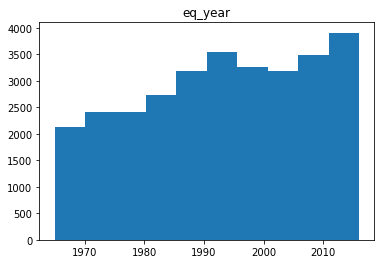

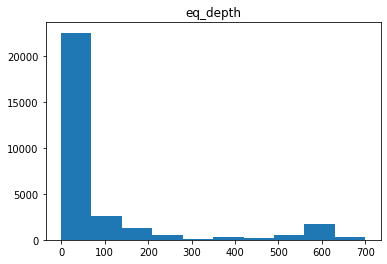

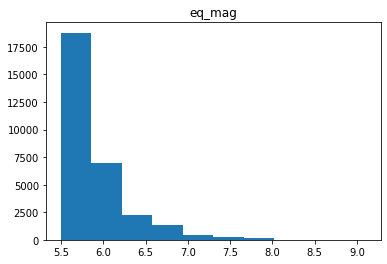

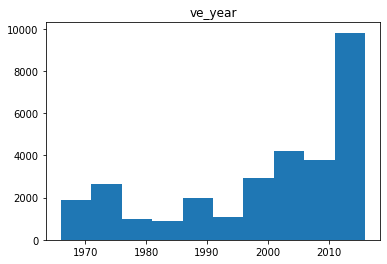

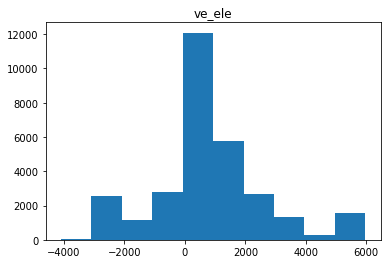

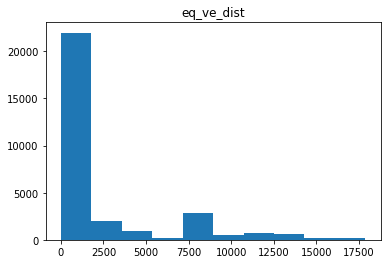

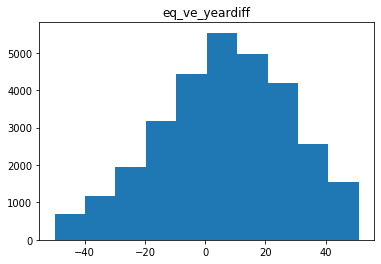

In [5]:
#distributions for all numeric variables 
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()
    
# Insight:
# 1. earthquake most likely happen in depth range from 0 - 100 km
# 2. there is an increase of earthquake and eruption activities by year
# 3. the distance of eq and ve most likely happen in 0 - 1500 km

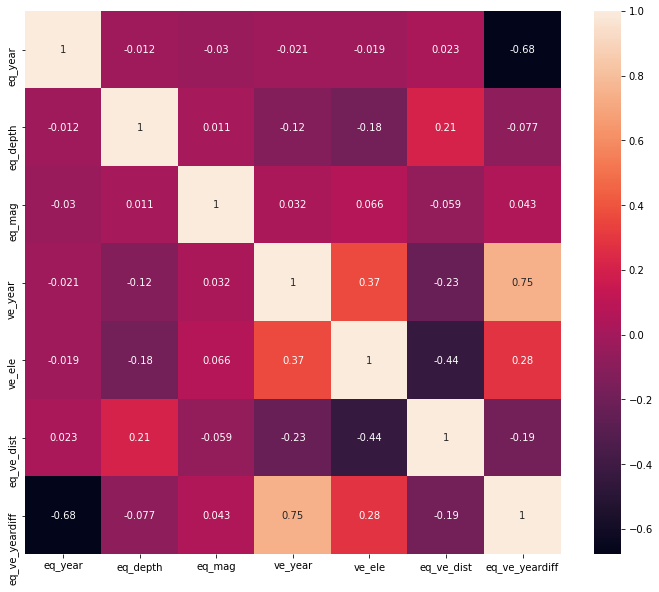

In [6]:
# Correlation plot
plt.figure(figsize = (12,10))
sns.heatmap(df_num.corr(),annot=True)

In [7]:
# pivot table shows comparation of potential eruption with averages of numerical data
pd.pivot_table(df, index = 'potential_eruption', values = ['eq_year','eq_depth','eq_mag','ve_year','ve_ele',
            'eq_ve_dist','eq_ve_yeardiff'])

# it shows that earthquake that has potential to trigger eruption is relatively happened in a more shallow depth,
# and at closest volcanoes with higher elevation.

,eq_depth,eq_mag,eq_ve_dist,eq_ve_yeardiff,eq_year,ve_ele,ve_year
potential_eruption,,,,,,,
0,102.428431,5.798046,2512.210002,4.731124,1993.613955,710.274093,1998.345078
1,77.255038,6.492738,177.512516,20.759376,1987.170926,1514.591769,2007.930302


### Categorical Data

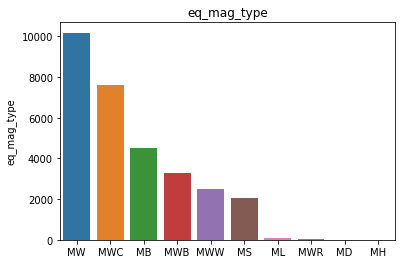

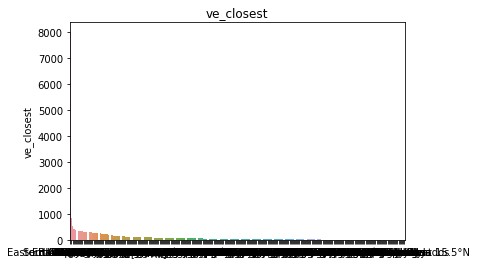

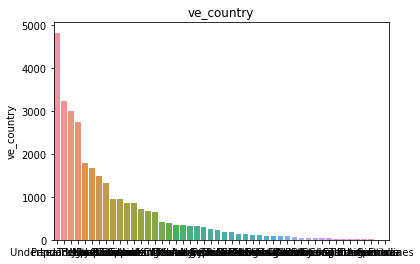

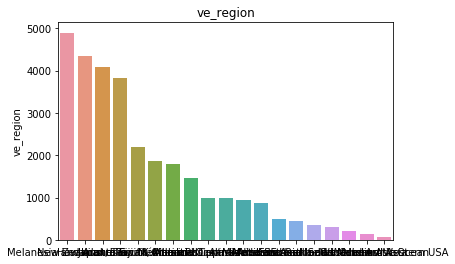

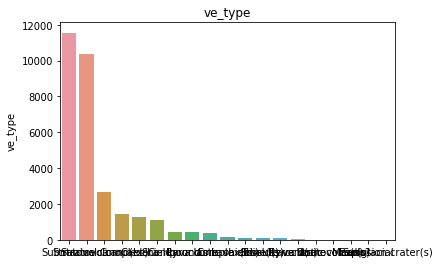

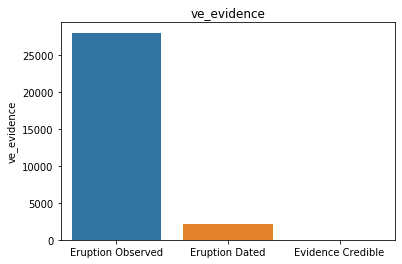

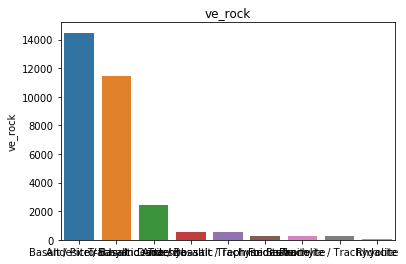

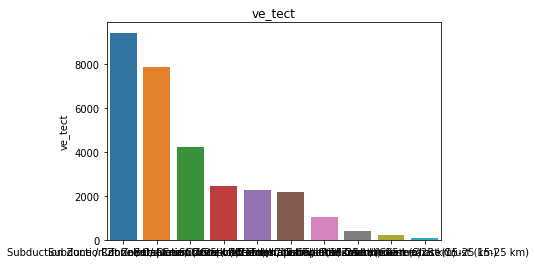

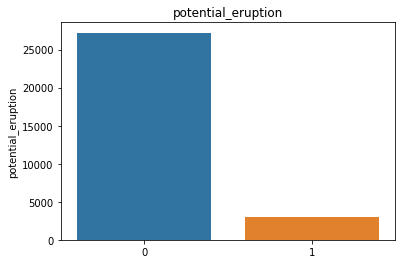

In [8]:
# barcharts for each categorical columns
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()
    
# our target data seems to be unbalanced.

# take notes that most of this looks messy and need a feature engineering:
# 1. ve_regions (this should represent both country and region columns)
# 2. ve_type
# 3. ve_rock
# 4. ve_tect

In [9]:
# i think the suitable pivot table for now is the eq_mag_type columns 
pd.pivot_table(df,index='potential_eruption',columns='eq_mag_type', values = 've_closest', aggfunc='count')

eq_mag_type,MB,MD,MH,ML,MS,MW,MWB,MWC,MWR,MWW
potential_eruption,,,,,,,,,,
0,4368.0,5.0,3.0,62.0,1680.0,8694.0,2918.0,7100.0,26.0,2361.0
1,122.0,1.0,2.0,3.0,393.0,1486.0,346.0,529.0,NaN,131.0


### Feature Engineering
1. ve_rock : we could divide rock type based on its acid, intermediate or basic composition (felsic, intermediate, Mafic)
2. ve_tect : we could split by the major tectonic setting (subduction or rift zone)


### ve_rock FE

In [10]:
df['ve_rock'].unique()
# acidic : 'Rhyolite','Dacite','Trachyte / Trachydacite'
# intermediate : 'Andesite / Basaltic Andesite','Dacite','Trachyte / Trachydacite','Trachyandesite / Basaltic Trachyandesite','Phonolite','Foidite'
# basic : 'Basalt / Picro-Basalt','Trachybasalt / Tephrite Basanite'

array(['Andesite / Basaltic Andesite', 'Basalt / Picro-Basalt',
       'Phonolite', 'Dacite', 'Trachyte / Trachydacite',
       'Trachyandesite / Basaltic Trachyandesite',
       'Trachybasalt / Tephrite Basanite', 'Foidite', 'Rhyolite'],
      dtype=object)

In [11]:
ve_rock_chem = []
for i in df['ve_rock']:
    if i == 'Rhyolite' or i == 'Dacite' or i == 'Trachyte / Trachydacite':
        ve_rock_chem.append('Felsic')
    elif i == 'Basalt / Picro-Basalt' or i == 'Trachybasalt / Tephrite Basanite':
        ve_rock_chem.append('Mafic')
    else :
        ve_rock_chem.append('Intermediate')
        
df['ve_rock_chem'] = ve_rock_chem

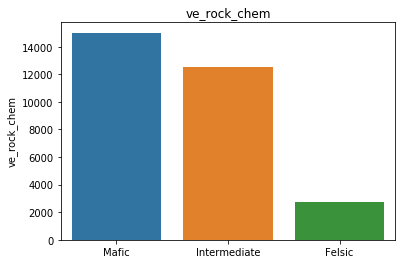

In [12]:
sns.barplot(df['ve_rock_chem'].value_counts().index,df['ve_rock_chem'].value_counts()).set_title('ve_rock_chem')
plt.show()

In [13]:
pd.pivot_table(df,index='potential_eruption',columns='ve_rock_chem', values = 've_closest', aggfunc='count')

# rock_chem potential eruption percentage
# felsic : 10.26 %
# intermediate : 16.95 %
# mafic : 6.73 %
# we could see that potential eruption more likely to happen with Intermediate rock's volcanoes

ve_rock_chem,Felsic,Intermediate,Mafic
potential_eruption,,,
0,2455,10697,14065
1,252,1814,947


### ve_tect FE

In [14]:
tect_full = df['ve_tect']
tect_full
# we could divide this into two columns the tectonic zones and tectonic crust

0              Subduction Zone / Crust Thickness Unknown
1              Subduction Zone / Oceanic Crust (< 15 km)
2              Subduction Zone / Oceanic Crust (< 15 km)
3              Subduction Zone / Oceanic Crust (< 15 km)
4           Subduction Zone / Continental Crust (>25 km)
5        Subduction Zone / Intermediate Crust (15-25 km)
6           Subduction Zone / Continental Crust (>25 km)
7        Subduction Zone / Intermediate Crust (15-25 km)
8              Subduction Zone / Oceanic Crust (< 15 km)
9                    Rift Zone / Oceanic Crust (< 15 km)
10          Subduction Zone / Continental Crust (>25 km)
11             Subduction Zone / Oceanic Crust (< 15 km)
12          Subduction Zone / Continental Crust (>25 km)
13             Subduction Zone / Oceanic Crust (< 15 km)
14          Subduction Zone / Continental Crust (>25 km)
15               Intraplate / Continental Crust (>25 km)
16       Subduction Zone / Intermediate Crust (15-25 km)
17       Subduction Zone / Inte

In [15]:
tect_zone = []
for i in tect_full:
    if 'Subduction' in i:
        tect_zone.append('Subduction Zone')
    elif 'Rift' in i:
        tect_zone.append('Rift Zone')
    else:
        tect_zone.append('Intraplate')

df['ve_tect_zone'] = tect_zone

In [16]:
tect_crust = []
for i in tect_full:
    if 'Oceanic' in i:
        tect_crust.append('Oceanic Crust')
    elif 'Continental' in i:
        tect_crust.append('Continental Crust')
    else:
        tect_crust.append('Intermediate Crust')

df['ve_tect_crust'] = tect_crust

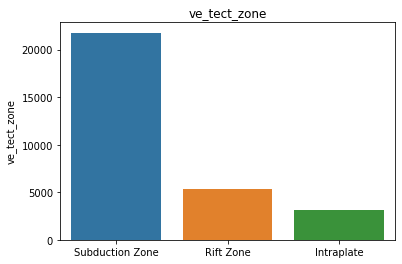

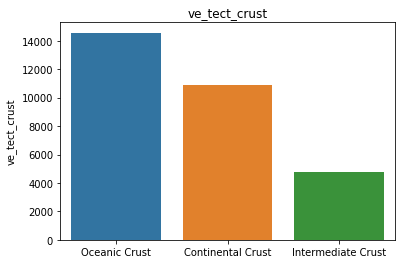

In [17]:
plt.figure()
sns.barplot(df['ve_tect_zone'].value_counts().index,df['ve_tect_zone'].value_counts()).set_title('ve_tect_zone')
plt.show()

plt.figure()
sns.barplot(df['ve_tect_crust'].value_counts().index,df['ve_tect_crust'].value_counts()).set_title('ve_tect_crust')
plt.show()

# we could see that earthquakes are most likely to happen in subduction zone and oceanic crust

In [18]:
pd.pivot_table(df,index='potential_eruption',columns='ve_tect_zone', values = 've_closest', aggfunc='count')

# tectonic zones with potential eruption percentage
# Intraplate : 0.71 %
# Rift Zone : 2.64 %
# Subduction Zone : 13.08 %
# we could see that potential eruption more likely to happen in Subduction Zones

ve_tect_zone,Intraplate,Rift Zone,Subduction Zone
potential_eruption,,,
0,3076,5221,18920
1,22,142,2849


In [19]:
pd.pivot_table(df,index='potential_eruption',columns='ve_tect_crust', values = 've_closest', aggfunc='count')

# tectonic crust with potential eruption percentage
# Continental Crust : 12.70 %
# Intermediate Crust : 14.95 %
# Oceanic Crust : 6.28 %
# we could see that potential eruption more likely to happen in Continental and Intermediate Crust

ve_tect_crust,Continental Crust,Intermediate Crust,Oceanic Crust
potential_eruption,,,
0,9497,4067,13653
1,1382,715,916


Now that we get the gist of our dataset we could tidy our data by sorting columns and delete unecessarily columns

In [20]:
df.columns

Index(['eq_date_time', 'eq_year', 'eq_lat', 'eq_lon', 'eq_depth', 'eq_mag',
       'eq_mag_type', 've_closest', 've_country', 've_region', 've_type',
       've_evidence', 've_year', 've_lat', 've_lon', 've_ele', 've_rock',
       've_tect', 'eq_ve_dist', 'eq_ve_yeardiff', 'potential_eruption',
       've_rock_chem', 've_tect_zone', 've_tect_crust'],
      dtype='object')

In [21]:
df = df[['eq_date_time', 'eq_year', 'eq_lat', 'eq_lon', 'eq_depth', 'eq_mag',
       'eq_mag_type', 've_closest', 've_country', 've_region', 've_type',
       've_evidence', 've_year', 've_lat', 've_lon', 've_ele', 've_rock','ve_rock_chem',
       've_tect','ve_tect_zone', 've_tect_crust', 'eq_ve_dist', 'eq_ve_yeardiff', 'potential_eruption']]
df.head()

,eq_date_time,eq_year,eq_lat,eq_lon,eq_depth,eq_mag,eq_mag_type,ve_closest,ve_country,ve_region,ve_type,ve_evidence,ve_year,ve_lat,ve_lon,ve_ele,ve_rock,ve_rock_chem,ve_tect,ve_tect_zone,ve_tect_crust,eq_ve_dist,eq_ve_yeardiff,potential_eruption
0,1965-01-02 13:44:18,1965,19.246,145.616,131.6,6.0,MW,Supply Reef,United States,"Japan, Taiwan, Marianas",Submarine,Eruption Dated,1989,20.130,145.100,-8,Andesite / Basaltic Andesite,Intermediate,Subduction Zone / Crust Thickness Unknown,Subduction Zone,Intermediate Crust,112.162847,24,0
1,1965-01-04 11:29:49,1965,1.863,127.352,80.0,5.8,MW,Ibu,Indonesia,Indonesia,Stratovolcano,Eruption Observed,2016,1.488,127.630,1325,Andesite / Basaltic Andesite,Intermediate,Subduction Zone / Oceanic Crust (< 15 km),Subduction Zone,Oceanic Crust,51.898694,51,0
2,1965-01-05 18:05:58,1965,-20.579,-173.972,20.0,6.2,MW,Tofua,Tonga,New Zealand to Fiji,Caldera,Eruption Observed,2014,-19.750,-175.070,515,Andesite / Basaltic Andesite,Intermediate,Subduction Zone / Oceanic Crust (< 15 km),Subduction Zone,Oceanic Crust,147.078303,49,1
3,1965-01-08 18:49:43,1965,-59.076,-23.557,15.0,5.8,MW,Montagu Island,United Kingdom,Antarctica,Shield,Eruption Observed,2007,-58.445,-26.374,1370,Basalt / Picro-Basalt,Mafic,Subduction Zone / Oceanic Crust (< 15 km),Subduction Zone,Oceanic Crust,176.936371,42,0
4,1965-01-09 13:32:50,1965,11.938,126.427,15.0,5.8,MW,Bulusan,Philippines,Philippines and SE Asia,Stratovolcano(es),Eruption Observed,2016,12.770,124.050,1565,Andesite / Basaltic Andesite,Intermediate,Subduction Zone / Continental Crust (>25 km),Subduction Zone,Continental Crust,274.261200,51,0


we could drop:
1. eq_date_time : since its represented by eq_year
2. eq_mag_type : it is represented by eq_mag and eq_depth
3. ve_evidence : doesn't have necessarily role
4. ve_rock : represented by ve_rock_chem
5. ve_tect : represented by ve_tect_zone and ve_tect_crust

In [22]:
df = df.drop(['eq_date_time','eq_mag_type','ve_evidence','ve_rock','ve_tect'],axis = 1)

In [23]:
df.head()

,eq_year,eq_lat,eq_lon,eq_depth,eq_mag,ve_closest,ve_country,ve_region,ve_type,ve_year,ve_lat,ve_lon,ve_ele,ve_rock_chem,ve_tect_zone,ve_tect_crust,eq_ve_dist,eq_ve_yeardiff,potential_eruption
0,1965,19.246,145.616,131.6,6.0,Supply Reef,United States,"Japan, Taiwan, Marianas",Submarine,1989,20.130,145.100,-8,Intermediate,Subduction Zone,Intermediate Crust,112.162847,24,0
1,1965,1.863,127.352,80.0,5.8,Ibu,Indonesia,Indonesia,Stratovolcano,2016,1.488,127.630,1325,Intermediate,Subduction Zone,Oceanic Crust,51.898694,51,0
2,1965,-20.579,-173.972,20.0,6.2,Tofua,Tonga,New Zealand to Fiji,Caldera,2014,-19.750,-175.070,515,Intermediate,Subduction Zone,Oceanic Crust,147.078303,49,1
3,1965,-59.076,-23.557,15.0,5.8,Montagu Island,United Kingdom,Antarctica,Shield,2007,-58.445,-26.374,1370,Mafic,Subduction Zone,Oceanic Crust,176.936371,42,0
4,1965,11.938,126.427,15.0,5.8,Bulusan,Philippines,Philippines and SE Asia,Stratovolcano(es),2016,12.770,124.050,1565,Intermediate,Subduction Zone,Continental Crust,274.261200,51,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30230 entries, 0 to 30229
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   eq_year             30230 non-null  int64  
 1   eq_lat              30230 non-null  float64
 2   eq_lon              30230 non-null  float64
 3   eq_depth            30230 non-null  float64
 4   eq_mag              30230 non-null  float64
 5   ve_closest          30230 non-null  object 
 6   ve_country          30230 non-null  object 
 7   ve_region           30230 non-null  object 
 8   ve_type             30230 non-null  object 
 9   ve_year             30230 non-null  int64  
 10  ve_lat              30230 non-null  float64
 11  ve_lon              30230 non-null  float64
 12  ve_ele              30230 non-null  int64  
 13  ve_rock_chem        30230 non-null  object 
 14  ve_tect_zone        30230 non-null  object 
 15  ve_tect_crust       30230 non-null  object 
 16  eq_v

In [26]:
df.to_csv('./data/final_earthquake_volcano.csv', index = False)